In [1]:
!git clone https://github.com/pnthi1604/vn_spelling_correction_bart_model

Cloning into 'vn_spelling_correction_bart_model'...
remote: Enumerating objects: 706, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 706 (delta 79), reused 89 (delta 46), pack-reused 580
Receiving objects: 100% (706/706), 437.83 KiB | 2.29 MiB/s, done.
Resolving deltas: 100% (446/446), done.


In [2]:
!pip install torcheval

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 4.0 MB/s eta 0:00:00


In [3]:
from vn_spelling_correction_bart_model import train, test, config

In [4]:
BART = "bart"
BART_WITH_EMBEDDING = "bart_with_embedding"
BART_SEQ2SEQ = "bart_seq2seq"

cf = config.get_config("/kaggle/working")
cf["tokenizer_src"] = "/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_src.json"
cf["tokenizer_tgt"] = "/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json"
cf["train_ds"] = "/kaggle/input/1m-mask-vi-and-vi-ds/train.csv"
cf["batch_train"] = 32
cf["batch_val"] = 32
cf["model_train"] = BART_WITH_EMBEDDING
cf["num_steps"] = 90000
cf["val_steps"] = 3000
cf["max_len"] = 100
cf["lr"] = 0.3
cf["dropout"] = 0.15
cf["weight_decay"] = 2e-4
cf["init_type"] = "xavier" 
cf["use_pytorch_metric"] = True
cf["petrain"] = True
cf

{'base_dir': '/kaggle/working',
 'tokenizer_tgt': '/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json',
 'tokenizer_src': '/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_src.json',
 'use_tokenizer': 'huggingface',
 'special_tokens': ['<s>', '</s>', '<pad>', '<unk>', '<mask>'],
 'vocab_size': 30000,
 'min_frequency': 2,
 'model_folder': '/kaggle/working/model',
 'model_basename': 'model_',
 'model_bart_basename': 'bart_model_',
 'model_inputs_embeds': 'inputs_embeds_',
 'model_decoder_inputs_embeds': 'decoder_inputs_embeds_',
 'model_out': 'out_',
 'preload': 'latest',
 'data': '/kaggle/working/data',
 'log_dir': '/kaggle/working/log',
 'log_files': '/kaggle/working/log/log_files',
 'loss_train': '/kaggle/working/log/log_files/loss_train.json',
 'loss_val': '/kaggle/working/log/log_files/loss_val.json',
 'loss_train_step': '/kaggle/working/log/log_files/loss_train_step.json',
 'loss_val_step': '/kaggle/working/log/log_files/loss_val_step.json',
 'timestep_train': '/

In [5]:
%cp -r /kaggle/input/pretrained-dataset-60k-step/60k_step/* /kaggle/working

Created:
/kaggle/working/model
/kaggle/working/log
/kaggle/working/log/log_files
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  40000
Vocab size tgt:  50000
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  40000
Vocab size tgt:  50000
Read dataset successfully
Length train dataset:  964000
Length val dataset:  30000
Length test dataset:  6000
Get dataloader successfully
Loaded model from /kaggle/working/model/model_0000060000.pt
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  40000
Vocab size tgt:  50000
Read dataset successfully
Length train dataset:  964000
Length val dataset:  30000
Length test dataset:  6000
Get d

Trainning: 100%|█████████▉| 29999/30125 [3:58:27<01:00,  2.10it/s, loss=0.612, global_step=0000089999]


Saved model at /kaggle/working/model/model_0000090000.pt
Saved config at /kaggle/working/model/config_0000090000.json


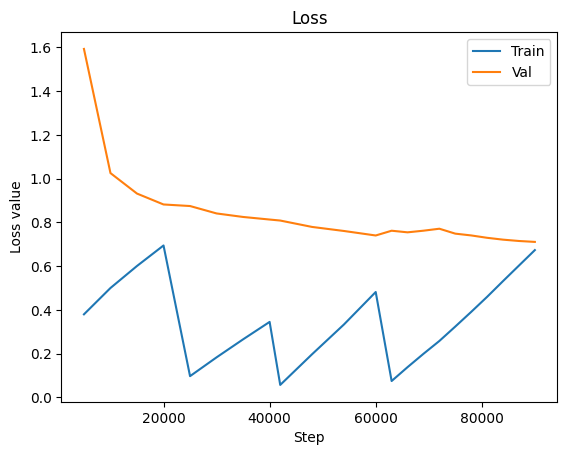

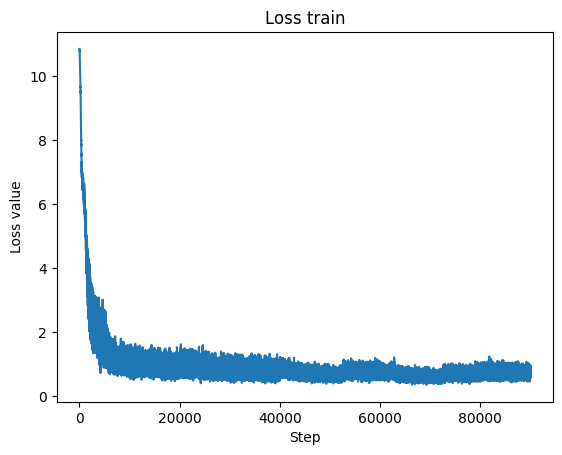

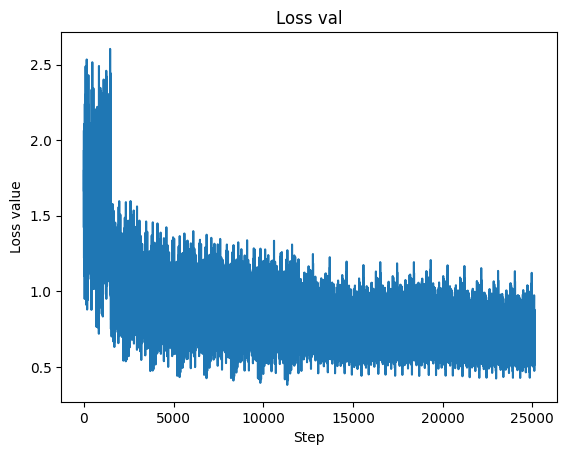

In [6]:
train.train(cf)

In [7]:
%rm -r /kaggle/working/model/config_0000060000.json /kaggle/working/model/model_0000060000.pt

In [8]:
test.test(cf)

/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  40000
Vocab size tgt:  50000
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  40000
Vocab size tgt:  50000
Read dataset successfully
Length train dataset:  964000
Length val dataset:  30000
Length test dataset:  6000
Get dataloader successfully
Length val_dataloader:  6000
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_src.json
/kaggle/input/1m-mask-vi-and-vi-ds/tokenizer/tokenizer_tgt.json
Read tokenizer successfully
Vocab size src:  40000
Vocab size tgt:  50000
Vocab size:  50000


Testing model...:   5%|▌         | 300/6000 [04:56<1:42:58,  1.08s/it]


    SOURCE: <mask> thể , ông tứ bị tuyên phạt 30 tháng tù , nguyễn tiến học - cựu <mask> <mask> đốc 30 tháng ; phạm thị kim <mask> - cựu <mask> phòng đăng ký <mask> doanh 4 năm 6 tháng <mask> phạm <mask> thu hường - cựu chánh văn phòng 42 tháng cùng tội "vi phạm quy định về đấu <mask> <mask> <mask> <mask> nghiêm <mask> .
    TARGET: cụ thể , ông tứ bị tuyên phạt 30 tháng tù , nguyễn tiến học - cựu phó giám đốc 30 tháng ; phạm thị kim tuyến - cựu trưởng phòng đăng ký kinh doanh 4 năm 6 tháng ; phạm thị thu hường - cựu chánh văn phòng 42 tháng cùng tội "vi phạm quy định về đấu thầu gây hậu quả nghiêm trọng" .
 PREDICTED: cụ thể , ông tứ bị tuyên phạt 30 tháng tù , nguyễn tiến học - cựu tổng giám đốc 30 tháng ; phạm thị kim anh - cựu trưởng phòng đăng ký kinh doanh 4 năm 6 tháng ; phạm thị thu hường - cựu chánh văn phòng 42 tháng cùng tội " vi phạm quy định về đấu thầu gây hậu quả nghiêm trọng " .
BLEU OF SENTENCE 300
BLEU_1: 0.970588207244873
BLEU_2: 0.955323338508606
BLEU_3: 0.93965703

Testing model...:  10%|█         | 600/6000 [09:48<1:29:06,  1.01it/s]


    SOURCE: bị cáo <mask> thành <mask> một lần nữa khẳng định <mask> bao giờ có cuộc gặp mặt ông kim cùng với tề trí dũng tại nhà nên <mask> nghị hđxx triệu tập <mask> kim <mask> tòa <mask> <mask> đối <mask> làm rõ những lời <mask> này . liên quan đến lời đề nghị này , luật sư <mask> chữa cho bị cáo <mask> đề nghị tương tự <mask>
    TARGET: bị cáo tất thành cang một lần nữa khẳng định chưa bao giờ có cuộc gặp mặt ông kim cùng với tề trí dũng tại nhà nên đề nghị hđxx triệu tập ông kim đến tòa để cùng đối chất làm rõ những lời khai này . liên quan đến lời đề nghị này , luật sư bào chữa cho bị cáo cũng đề nghị tương tự .
 PREDICTED: bị cáo kim thành đã một lần nữa khẳng định chưa bao giờ có cuộc gặp mặt ông kim cùng với tề trí dũng tại nhà nên đề nghị hđxx triệu tập nguyễn kim tại tòa để các đối tượng làm rõ những lời khai này . liên quan đến lời đề nghị này , luật sư bào chữa cho bị cáo dũng đề nghị tương tự .
BLEU OF SENTENCE 600
BLEU_1: 0.8970588445663452
BLEU_2: 0.8423857092857361
B

Testing model...:  15%|█▌        | 900/6000 [14:44<1:32:52,  1.09s/it]


    SOURCE: <mask> học <mask> ngữ , đại học quốc gia hà nội: <mask> <mask> chuyển sang hình thức học tập <mask> tuyến trong <mask> 29 . 1 . đồng thời , trường cũng hoãn các kỳ <mask> diễn ra trong ngày này . đại học kinh <mask> , <mask> học quốc gia hà nội: toàn bộ sinh viên nghỉ học <mask> <mask> 29 . 1 đến hết ngày <mask> . <mask> <mask>
    TARGET: đại học ngoại ngữ , đại học quốc gia hà nội: sinh viên chuyển sang hình thức học tập trực tuyến trong ngày 29 . 1 . đồng thời , trường cũng hoãn các kỳ thi diễn ra trong ngày này . đại học kinh tế , đại học quốc gia hà nội: toàn bộ sinh viên nghỉ học từ ngày 29 . 1 đến hết ngày 31 . 1 .
 PREDICTED: đại học ngoại ngữ , đại học quốc gia hà nội : thời gian chuyển sang hình thức học tập trực tuyến trong ngày 29 . 1 . đồng thời , trường cũng hoãn các kỳ thi diễn ra trong ngày này . đại học kinh tế , đại học quốc gia hà nội : toàn bộ sinh viên nghỉ học từ ngày 29 . 1 đến hết ngày 28 . 1 .
BLEU OF SENTENCE 900
BLEU_1: 0.9589040875434875
BLEU_2:

Testing model...:  20%|██        | 1200/6000 [19:40<1:17:31,  1.03it/s]


    SOURCE: những bức tường , ngôi nhà và nền gạch xung quanh vẫn được bảo quản tốt . các nhà khảo cổ cũng khai quật được một tấm bia đá trong sân vườn . theo dòng chữ khắc trên tấm bia , sân trong là địa điểm đặt một ngôi đền có tên là cung điện hàm linh .
    TARGET: những bức tường , ngôi nhà và nền gạch xung quanh vẫn được bảo quản tốt . các nhà khảo cổ cũng khai quật được một tấm bia đá trong sân vườn . theo dòng chữ khắc trên tấm bia , sân trong là địa điểm đặt một ngôi đền có tên là cung điện hàm linh .
 PREDICTED: những bức tường , ngôi nhà và nền gạch xung quanh vẫn được bảo quản tốt . các nhà khảo cổ cũng khai quật được một tấm bia đá trong sân vườn . theo dòng chữ khắc trên tấm bia , sân trong là địa điểm đặt một ngôi đền có tên là cung điện hàm linh .
BLEU OF SENTENCE 1200
BLEU_1: 1.0
BLEU_2: 1.0
BLEU_3: 1.0
BLEU_4: 1.0
label_ids = tensor([  52, 1015, 1506,    5, 1179,   54,    7,  778, 2392, 1132, 1006,  264,
          15,  146,  330,  328,    6,    9,   54,  914,  452,  

Testing model...:  25%|██▌       | 1500/6000 [24:41<1:14:35,  1.01it/s]


    SOURCE: trường <mask> quá cảnh , chuyển <mask> thì phải đáp ứng điều kiện quá cảnh , <mask> tải theo quy <mask> <mask> hiệp định cptpp , <mask> thể: a- hàng hóa được vận chuyển tới việt nam vẫn được giữ nguyên xuất xứ nếu không quá cảnh , chuyển <mask> qua lãnh <mask> của nước không phải <mask> <mask> của hiệp định <mask> <mask>
    TARGET: trường hợp quá cảnh , chuyển tải thì phải đáp ứng điều kiện quá cảnh , chuyển tải theo quy định của hiệp định cptpp , cụ thể: a- hàng hóa được vận chuyển tới việt nam vẫn được giữ nguyên xuất xứ nếu không quá cảnh , chuyển tải qua lãnh thổ của nước không phải thành viên của hiệp định cptpp .
 PREDICTED: trường hợp quá cảnh , chuyển đổi thì phải đáp ứng điều kiện quá cảnh , quá tải theo quy định của hiệp định cptpp , cụ thể : a - hàng hóa được vận chuyển tới việt nam vẫn được giữ nguyên xuất xứ nếu không quá cảnh , chuyển tiền qua lãnh thổ của nước không phải là tiền của hiệp định cptpp .
BLEU OF SENTENCE 1500
BLEU_1: 0.9242424368858337
BLEU_2: 

Testing model...:  30%|███       | 1800/6000 [29:35<1:08:47,  1.02it/s]


    SOURCE: theo ông shu , đội nhân viên của ông đã chuẩn bị cho những trận tuyết rơi dày và nhiệt độ thấp được dự báo sẽ diễn ra vào giữa thế vận hội . "theo dự báo thời tiết , sẽ có một cơn bão tuyết xảy ra trong vài ngày tới và chúng tôi đã sẵn sàng để đối phó với nó .
    TARGET: theo ông shu , đội nhân viên của ông đã chuẩn bị cho những trận tuyết rơi dày và nhiệt độ thấp được dự báo sẽ diễn ra vào giữa thế vận hội . "theo dự báo thời tiết , sẽ có một cơn bão tuyết xảy ra trong vài ngày tới và chúng tôi đã sẵn sàng để đối phó với nó .
 PREDICTED: theo ông nghiêm , đội nhân viên của ông đã chuẩn bị cho những trận tuyết rơi dày và nhiệt độ thấp được dự báo sẽ diễn ra vào giữa thế vận hội . " theo dự báo thời tiết , sẽ có một cơn bão tuyết xảy ra trong vài ngày tới và chúng tôi đã sẵn sàng để đối phó với nó .
BLEU OF SENTENCE 1800
BLEU_1: 0.9846153855323792
BLEU_2: 0.9766504764556885
BLEU_3: 0.9684926867485046
BLEU_4: 0.9642449021339417
label_ids = tensor([   32,    55, 18776,     5

Testing model...:  35%|███▌      | 2100/6000 [34:29<1:10:27,  1.08s/it]


    SOURCE: với <mask> đại biểu có mặt tham gia biểu quyết tán thành <mask> quốc hội đã <mask> qua nghị <mask> bầu <mask> tịch nước . ngay <mask> khi được <mask> , chủ tịch nước nguyễn xuân phúc đã thực hiện <mask> thức tuyên thệ . lễ tuyên thệ của chủ tịch <mask> <mask> xuân phúc đã diễn <mask> trang trọng <mask> hội trường <mask> hồng .
    TARGET: với 100% đại biểu có mặt tham gia biểu quyết tán thành , quốc hội đã thông qua nghị quyết bầu chủ tịch nước . ngay sau khi được bầu , chủ tịch nước nguyễn xuân phúc đã thực hiện nghi thức tuyên thệ . lễ tuyên thệ của chủ tịch nước nguyễn xuân phúc đã diễn ra trang trọng tại hội trường diên hồng .
 PREDICTED: với các đại biểu có mặt tham gia biểu quyết tán thành , quốc hội đã thông qua nghị quyết bầu chủ tịch nước . ngay sau khi được bầu , chủ tịch nước nguyễn xuân phúc đã thực hiện nghi thức tuyên thệ . lễ tuyên thệ của chủ tịch nước nguyễn xuân phúc đã diễn ra trang trọng tại hội trường sơn hồng .
BLEU OF SENTENCE 2100
BLEU_1: 0.95511536

Testing model...:  40%|████      | 2400/6000 [39:23<1:01:28,  1.02s/it]


    SOURCE: <mask> bệnh <mask> tháng tuổi , có tiếp xúc gần <mask> . các tỉnh có <mask> <mask> <mask> . hcm <mask> ; khánh hòa ( <mask> ; thanh hóa ( <mask> điều trị khỏi: 15 trường hợp <mask> du học sinh trở về từ vùng dịch ở hàn quốc <mask> ly chiều 24 .
    TARGET: - 1 bệnh nhi 3 tháng tuổi , có tiếp xúc gần với bệnh nhân covid-19 . các tỉnh có người mắc covid-19: vĩnh phúc ( 11 ) ; tp . hcm ( 3 ) ; khánh hòa ( 1 ) ; thanh hóa ( 1 ) . điều trị khỏi: 15 trường hợp . 1 du học sinh trở về từ vùng dịch ở hàn quốc chủ động đề nghị cách ly chiều 24 .
 PREDICTED: - bệnh nhân nữ , 24 tháng tuổi , có tiếp xúc gần với bệnh nhân nữ . các tỉnh có tiếp xúc gần với bệnh nhân tại tp . hcm , đà nẵng ; khánh hòa ( quảng ninh ) ; thanh hóa ( cách ly ) ; điều trị khỏi : 15 trường hợp có tiếp xúc với du học sinh trở về từ vùng dịch ở hàn quốc , sau đó cách ly chiều 24 .
BLEU OF SENTENCE 2400
BLEU_1: 0.6458870810619154
BLEU_2: 0.5786414599084738
BLEU_3: 0.5169517778004459
BLEU_4: 0.45734724413225225
la

Testing model...:  45%|████▌     | 2700/6000 [44:20<55:49,  1.01s/it]


    SOURCE: nhân dịp <mask> ukhnaa <mask> được bầu làm thủ tướng mông cổ , <mask> 5 . 10 , thủ tướng chính phủ nguyễn <mask> phúc đã gửi điện <mask> . <mask> 4 . 4 <mask> quốc hội mông cổ xác nhận ngài <mask> khurelsukh được bầu <mask> thủ tướng thứ 30 của <mask> này <mask> tân thủ tướng mông cổ từng <mask> phó thủ <mask> <mask> thuộc đảng nhân dân <mask> cổ ( mpp ) .
    TARGET: nhân dịp ngài ukhnaa khurelsukh được bầu làm thủ tướng mông cổ , ngày 5 . 10 , thủ tướng chính phủ nguyễn xuân phúc đã gửi điện mừng . ngày 4 . 4 , quốc hội mông cổ xác nhận ngài ukhnaa khurelsukh được bầu là thủ tướng thứ 30 của nước này . tân thủ tướng mông cổ từng là phó thủ tướng , thuộc đảng nhân dân mông cổ ( mpp ) .
 PREDICTED: nhân dịp năm , được bầu làm thủ tướng mông cổ , ngày 5 . 10 , thủ tướng chính phủ nguyễn xuân phúc đã gửi điện thoại . ngày 4 . 4 , quốc hội mông cổ xác nhận ngài . được bầu làm thủ tướng thứ 30 của nước này . tân thủ tướng mông cổ từng là phó thủ tướng trực thuộc đảng nhân dân 

Testing model...:  50%|█████     | 3000/6000 [49:15<48:48,  1.02it/s]


    SOURCE: <mask> đoàn flc trịnh văn quyết ngày <mask> khởi tố và bị bắt với cáo buộc <mask> "che <mask> . cùng ngày , <mask> quyết đã ủy quyền việc điều <mask> hải <mask> tập đoàn .
    TARGET: chủ tịch tập đoàn flc trịnh văn quyết ngày 29 . 3 bị khởi tố và bị bắt với cáo buộc "thao túng" và "che giấu thông tin chứng khoán" . cùng ngày , ông trịnh văn quyết đã ủy quyền việc điều hành cho bà vũ đặng hải yến , phó tổng giám đốc tập đoàn .
 PREDICTED: trước đó , tập đoàn flc trịnh văn quyết ngày 20 . 12 đã bị khởi tố và bị bắt với cáo buộc " che giấu " quyền lực của mình . cùng ngày , ông trịnh văn quyết đã ủy quyền việc điều tra bổ nhiệm ông trịnh văn quyết tại tập đoàn .
BLEU OF SENTENCE 3000
BLEU_1: 0.6083409644053003
BLEU_2: 0.5545242798896193
BLEU_3: 0.5102169812389651
BLEU_4: 0.466177968029642
label_ids = tensor([ 103,  281,  216,  155, 2530, 1606,  131,  206,   21,  763,    6,   88,
          58,  700,  540,    7,   58,  349,   17,  257,  812,   63, 1237, 2660,
          63,    

Testing model...:  55%|█████▌    | 3300/6000 [54:08<43:36,  1.03it/s]


    SOURCE: "chúng tôi <mask> về các <mask> astana <mask> <mask> yahya al-aridi tiết <mask> <mask> ông yahya al-aridi <mask> được thỏa thuận với sự ủng hộ của tất cả các bên tại astana sẽ <mask> các cuộc <mask> quan trọng trong cuộc họp sắp tới tại geneva .
    TARGET: "chúng tôi lạc quan thận trọng về các cuộc hội đàm astana lần thứ 6" , ông yahya al-aridi tiết lộ với arab news . theo ông yahya al-aridi việc đạt được thỏa thuận với sự ủng hộ của tất cả các bên tại astana sẽ mở đường cho các cuộc hội đàm chính trị quan trọng trong cuộc họp sắp tới tại geneva .
 PREDICTED: " chúng tôi sẽ thảo luận về các cuộc đàm phán với xã hội ” - ông nghiêm xuân thành nói . ông lễ hội nhà trắng ( ) đã được thỏa thuận với sự ủng hộ của tất cả các bên tại hoãn sẽ có các cuộc đàm phán quan trọng trong cuộc họp sắp tới tại geneva .
BLEU OF SENTENCE 3300
BLEU_1: 0.5688685885926156
BLEU_2: 0.4568317900329076
BLEU_3: 0.3977050258463951
BLEU_4: 0.35351608300325266
label_ids = tensor([   63,   245,   173,  1

Testing model...:  60%|██████    | 3600/6000 [58:59<41:17,  1.03s/it]


    SOURCE: bs <mask> trọng dũng , ca bệnh hy hữu nữa là cách đây hơn 1 <mask> , một <mask> <mask> nhập viện cấp <mask> <mask> <mask> phải thuốc cai nghiện của bố mẹ ( methadone ) và bị hôn mê <mask> đối <mask> loại <mask> độc này , nếu có thuốc giải độc tố đặc hiệu <mask> mới cứu được <mask>
    TARGET: bs nguyễn trọng dũng , ca bệnh hy hữu nữa là cách đây hơn 1 tháng , một bệnh nhi nhập viện cấp cứu do uống phải thuốc cai nghiện của bố mẹ ( methadone ) và bị hôn mê . đối với loại ngộ độc này , nếu có thuốc giải độc tố đặc hiệu thì mới cứu được .
 PREDICTED: bs nguyễn trọng dũng , ca bệnh hy hữu nữa là cách đây hơn 1 năm , một năm sau nhập viện cấp cứu , không phải thuốc cai nghiện của bố mẹ ( kiện ) và bị hôn mê . đối với loại thuốc độc này , nếu có thuốc giải độc tố đặc hiệu thì mới cứu được .
BLEU OF SENTENCE 3600
BLEU_1: 0.8852459192276001
BLEU_2: 0.8415442705154419
BLEU_3: 0.7958851456642151
BLEU_4: 0.7530628442764282
label_ids = tensor([1661,  188,  295,  990,    5,  282,   56,

Testing model...:  65%|██████▌   | 3900/6000 [1:03:58<33:03,  1.06it/s]


    SOURCE: thụy điển có triển khai những hạn chế sau khi dịch bệnh bùng phát như cấm tập trung hơn 50 người , người dân được thông báo tránh di chuyển không cần thiết và tránh tiếp xúc với người cao tuổi . nhưng người dân nước này vẫn được phép đến các nhà hàng , bar , quán cà phê và hộp đêm .
    TARGET: thụy điển có triển khai những hạn chế sau khi dịch bệnh bùng phát như cấm tập trung hơn 50 người , người dân được thông báo tránh di chuyển không cần thiết và tránh tiếp xúc với người cao tuổi . nhưng người dân nước này vẫn được phép đến các nhà hàng , bar , quán cà phê và hộp đêm .
 PREDICTED: thụy điển có triển khai những hạn chế sau khi dịch bệnh bùng phát như cấm tập trung hơn 50 người , người dân được thông báo tránh di chuyển không cần thiết và tránh tiếp xúc với người cao tuổi . nhưng người dân nước này vẫn được phép đến các nhà hàng , bar , quán cà phê và hộp đêm .
BLEU OF SENTENCE 3900
BLEU_1: 1.0
BLEU_2: 1.0
BLEU_3: 1.0
BLEU_4: 1.0
label_ids = tensor([1716, 1548,    8,  19

Testing model...:  70%|███████   | 4200/6000 [1:08:55<30:55,  1.03s/it]


    SOURCE: đồng thời , phải có <mask> nhất <mask> năm trực tiếp <mask> <mask> hoặc nghiên cứu <mask> <mask> môn phù hợp với môn học <mask> hoạt <mask> <mask> dục có sách giáo khoa được biên soạn ; là <mask> dân <mask> nam <mask> có phẩm chất <mask> đức , tư tưởng tốt . thời gian đào tạo trung cấp , <mask> đẳng tối đa là 4 <mask> 5 năm kể từ ngày 15 . 5 .
    TARGET: đồng thời , phải có ít nhất ba năm trực tiếp giảng dạy hoặc nghiên cứu về chuyên môn phù hợp với môn học , hoạt động giáo dục có sách giáo khoa được biên soạn ; là công dân việt nam , có phẩm chất đạo đức , tư tưởng tốt . thời gian đào tạo trung cấp , cao đẳng tối đa là 4 , 5 năm kể từ ngày 15 . 5 .
 PREDICTED: đồng thời , phải có ít nhất 2 năm trực tiếp thực hiện hoặc nghiên cứu kỹ chuyên môn phù hợp với môn học , hoạt động giáo dục có sách giáo khoa được biên soạn ; là công dân việt nam phải có phẩm chất đạo đức , tư tưởng tốt . thời gian đào tạo trung cấp , cao đẳng tối đa là 4 , 5 năm kể từ ngày 15 . 5 .
BLEU OF SENTE

Testing model...:  75%|███████▌  | 4500/6000 [1:13:52<25:47,  1.03s/it]


    SOURCE: sau 5 năm không xuất hiện , al-baghdadi bất ngờ tái xuất vào tháng 4 năm nay , khi cảnh quay hắn ta thảo luận về thánh chiến với tay chân được tung ra . đoạn video cho thấy al-baghdadi tuyên bố rằng các vụ đánh bom trong lễ phục sinh ở sri lanka là cuộc trả thù cho những trận chiến đã mất ở syria .
    TARGET: sau 5 năm không xuất hiện , al-baghdadi bất ngờ tái xuất vào tháng 4 năm nay , khi cảnh quay hắn ta thảo luận về thánh chiến với tay chân được tung ra . đoạn video cho thấy al-baghdadi tuyên bố rằng các vụ đánh bom trong lễ phục sinh ở sri lanka là cuộc trả thù cho những trận chiến đã mất ở syria .
 PREDICTED: sau 5 năm không xuất hiện , al - baghdadi bất ngờ tái xuất vào tháng 4 năm nay , khi cảnh quay hắn ta thảo luận về thánh chiến với tay chân được tung ra . đoạn video cho thấy al - baghdadi tuyên bố rằng các vụ đánh bom trong lễ phục sinh ở sri lanka là cuộc trả thù cho những trận chiến đã mất ở syria .
BLEU OF SENTENCE 4500
BLEU_1: 1.0
BLEU_2: 1.0
BLEU_3: 1.0
B

Testing model...:  80%|████████  | 4800/6000 [1:18:50<18:10,  1.10it/s]


    SOURCE: chị <mask> thị ánh tuyết ( <mask> bà nguyễn thị minh - <mask> <mask> 8 người tử vong trong <mask> tai biến từ tháng 5 . <mask> ) cho biết: chị và một số gia đình nạn nhân đã nhận được giấy <mask> triệu tập của tòa đến <mask> xét <mask> vụ <mask> .
    TARGET: chị nguyễn thị ánh tuyết ( con bà nguyễn thị minh - 1 trong 8 người tử vong trong vụ tai biến từ tháng 5 . 2017 ) cho biết: chị và một số gia đình nạn nhân đã nhận được giấy mời triệu tập của tòa đến dự xét xử vụ án .
 PREDICTED: chị nguyễn thị ánh tuyết ( chồng bà nguyễn thị minh - sinh viên 8 người tử vong trong vụ tai biến từ tháng 5 . 2019 ) cho biết : chị và một số gia đình nạn nhân đã nhận được giấy tờ triệu tập của tòa đến xem xét nhiệm vụ án .
BLEU OF SENTENCE 4800
BLEU_1: 0.8727272748947144
BLEU_2: 0.8140186071395874
BLEU_3: 0.7591955065727234
BLEU_4: 0.7028520107269287
label_ids = tensor([ 342,  188,  130,  882, 1803,   24,  193,  268,  188,  130,  273,   11,
          53,   12,  227,   19,  403,  659,   12,

Testing model...:  85%|████████▌ | 5100/6000 [1:23:47<15:42,  1.05s/it]


    SOURCE: <mask> ra , trung đoàn 720 còn <mask> tư gần 7 tỉ <mask> xây dựng đường nội vùng ở các thôn bản <mask> đắk ngo , đường vào khu sản xuất . để <mask> đẹp <mask> thôn , bản , trung đoàn 720 đã <mask> tư <mask> dựng 20km đường <mask> <mask> vụ chiếu sáng tại các khu dân <mask> <mask> bản si át , <mask> <mask> , sín chải .
    TARGET: ngoài ra , trung đoàn 720 còn đầu tư gần 7 tỉ đồng xây dựng đường nội vùng ở các thôn bản xã đắk ngo , đường vào khu sản xuất . để làm đẹp cho thôn , bản , trung đoàn 720 đã đầu tư xây dựng 20km đường điện phục vụ chiếu sáng tại các khu dân cư thuộc bản si át , giang châu , sín chải .
 PREDICTED: ngoài ra , trung đoàn 720 còn đầu tư gần 7 tỉ đồng đa dựng đường nội vùng ở các nhau bản na đắk cư , đường vào khu sản xuất . để làm đẹp tại ứng , bản , trung đoàn 720 đã được tư xây dựng 20km đường để phục vụ chiếu sáng tại các khu dân , các bản si , xã , , chốt , chốt , chốt .
BLEU OF SENTENCE 5100
BLEU_1: 0.76712328195

Testing model...:  90%|█████████ | 5400/6000 [1:28:43<09:58,  1.00it/s]


    SOURCE: các em nhận khen thưởng đều được lđlđ thành phố xét chọn nhằm ghi nhận những nỗ lực và phần nào chia sẻ , động viên các em cố gắng nhiều hơn nữa trong học tập , cuộc sống . tại buổi lễ , lđlđ thành phố đã trao quà , giấy chứng nhận và học bổng trị giá 1 . 000 .
    TARGET: các em nhận khen thưởng đều được lđlđ thành phố xét chọn nhằm ghi nhận những nỗ lực và phần nào chia sẻ , động viên các em cố gắng nhiều hơn nữa trong học tập , cuộc sống . tại buổi lễ , lđlđ thành phố đã trao quà , giấy chứng nhận và học bổng trị giá 1 . 000 .
 PREDICTED: các em nhận khen thưởng đều được lđlđ thành phố xét chọn nhằm ghi nhận những nỗ lực và phần nào chia sẻ , động viên các em cố gắng nhiều hơn nữa trong học tập , cuộc sống . tại buổi lễ , lđlđ thành phố đã trao quà , giấy chứng nhận và học bổng trị giá 1 . 000 .
BLEU OF SENTENCE 5400
BLEU_1: 1.0
BLEU_2: 1.0
BLEU_3: 1.0
BLEU_4: 1.0
label_ids = tensor([   9,  325,  112, 1438,  814,  409,   15,  697,   60,  229,  228,  623,
         641,  

Testing model...:  95%|█████████▌| 5700/6000 [1:33:43<05:02,  1.01s/it]


    SOURCE: phần <mask> gian còn <mask> hướng về các <mask> <mask> sinh <mask> trao học bổng cho các học sinh giỏi , học <mask> <mask> hoàn cảnh <mask> <mask> , đặc biệt các em thuộc <mask> tộc ít người , <mask> dương những giáo viên dạy giỏi , văn nghệ chào mừng năm học mới .
    TARGET: phần thời gian còn lại hướng về các em học sinh như: trao học bổng cho các học sinh giỏi , học sinh có hoàn cảnh khó khăn , đặc biệt các em thuộc dân tộc ít người , tuyên dương những giáo viên dạy giỏi , văn nghệ chào mừng năm học mới .
 PREDICTED: phần thời gian còn lại hướng về các em học sinh được trao học bổng cho các học sinh giỏi , học tập trong hoàn cảnh khó khăn , đặc biệt các em thuộc dân tộc ít người , biểu dương những giáo viên dạy giỏi , văn nghệ chào mừng năm học mới .
BLEU OF SENTENCE 5700
BLEU_1: 0.9105655762462919
BLEU_2: 0.8821847341695035
BLEU_3: 0.852717386401769
BLEU_4: 0.8220440717506509
label_ids = tensor([ 266,   76,  209,  150,  107,  344,   35,    9,  325,   29,   51,  101,
 

Testing model...: 100%|██████████| 6000/6000 [1:38:43<00:00,  1.01it/s]


    SOURCE: <mask> <mask> xe tấp nập , <mask> <mask> bà thư với <mask> <mask> nhanh thoăn <mask> chỉ rẽ <mask> , rẽ phải <mask> người đi đường đầy <mask> nghiệp , giờ đây đã trở <mask> quen thuộc . nhiều người cho <mask> , hôm nào không thấy bà thư đứng “làm <mask> vụ” thì hôm đó <mask> phương tiện qua đoạn cổng viện gần như “giậm chân tại chỗ” .
    TARGET: giữa dòng xe tấp nập , hình ảnh bà thư với cử chỉ nhanh thoăn thoắt chỉ rẽ trái , rẽ phải cho người đi đường đầy chuyên nghiệp , giờ đây đã trở nên quen thuộc . nhiều người cho biết , hôm nào không thấy bà thư đứng “làm nhiệm vụ” thì hôm đó các phương tiện qua đoạn cổng viện gần như “giậm chân tại chỗ” .
 PREDICTED: khi đi xe tấp nập , người nhà bà thư với tốc độ nhanh hiểm , chỉ rẽ phải , rẽ phải là người đi đường đầy chuyên nghiệp , giờ đây đã trở thành quen thuộc . nhiều người cho biết , hôm nào không thấy bà thư đứng “ làm nhiệm vụ ” thì hôm đó , phương tiện qua đoạn cổng viện gần như “ mưa chân tại chỗ ” .
BLEU OF SENTENCE 60

recall = 0.6826837062835693
precision = 0.6826837062835693
f_05 = 0.6826836466789246
     bleu_1    bleu_2    bleu_3   bleu_4    recall  precision      f_05
0  0.883356  0.846227  0.813981  0.78448  0.682684   0.682684  0.682684
